In [1]:
from IPython.display import display, Math, Latex
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import broyden1
%matplotlib inline

__1. Plot the Fisher Information $J(s)$ for the Bernoulli neuron and for a Poisson, assuming $f(s) = \frac{1}{s^2+1}$, as a function of $s$.__

$
\begin{align*}
&\text{From Hw3 Q3 we know that for a Bernoulli Neuron with tuning curve } f(s).
\text{ The Fisher Information } J_s \text{ is:}\\
&J(s)=(f'(s))^2\frac{1}{f(s)(1-f(s))}\\
&\because f(s) = \frac{1}{s^2+1}\\
&\therefore f'(s) = \frac{-2s}{(1+s^2)^2}\\
&\therefore J(s) = \frac{4s^2}{(1+s^2)^4}(s^2+1)\frac{s^2+1}{s^2} = \frac{4}{(1+s^2)^2}
\end{align*}
$

$
\begin{align*}
&\text{From Lecture 4 slides 11, we know that for neuron with Poisson noise, the Fisher Information } J_s \text{ is:}\\
&J(s) = (f'(s))^2\frac{1}{f(s)}\\
&\therefore J(s) = \frac{4s^2}{(1+s^2)^4}(1+s^2)=\frac{4s^2}{(1+s^2)^3}
\end{align*}
$

Text(0.5, 1.0, 'Fisher Information J(s) for a Poisson Neuron')

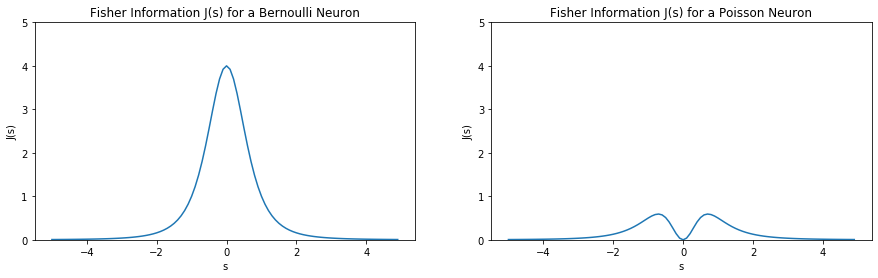

In [2]:
s = np.arange(-5,5,0.1)
Js_Bernoulli = 4/(1+s**2)**2
Js_Poisson = 4*s**2/(1+s**2)**3
plt.figure(figsize=(15, 4))
plt.subplot(1,2,1)
plt.plot(s,Js_Bernoulli)
plt.ylim([0,5])
plt.xlabel('s')
plt.ylabel('J(s)')
plt.title('Fisher Information J(s) for a Bernoulli Neuron')
plt.subplot(1,2,2)
plt.plot(s,Js_Poisson)
plt.ylim([0,5])
plt.xlabel('s')
plt.ylabel('J(s)')
plt.title('Fisher Information J(s) for a Poisson Neuron')

__2. For the Bernoulli neuron with $f(s) = \frac{1}{1+s^2}$ from previous task.<br>
(a) Compute the minimum discrimination error for the two stimuli $s_1 = 1$ and $s_2 = 2$ assuming equal prior probability for the two stimuli.__

$
\begin{align*}
\text{For the neuron with Bernoulli noise:}\\
\end{align*}
$

$
\begin{align*}
&P(r|f(s)) = f(s)^r (1-f(s))^{1-r}\\
&\therefore P(r|s) = \big( \frac{1}{1+s^2} \big)^r \big( \frac{s^2}{1+s^2} \big)^{1-r}\\
&MDE = \int \! \min\{P(r|s_1)P(s_1), P(r|s_2)P(s_2)\} \, \mathrm{d}s\\
&\text{Assuming equal prior probability for the two stimuli}
\Rightarrow P(s_1) = P(s_2)=0.5
\end{align*}
$

$
\begin{align*}
P(r|s_1)P(s_1)=(\frac{1}{2})^r(\frac{1}{2})^{1-r}\cdot 0.5 = 
 \begin{cases}
      0.25, & r=0 \\
      0.25, & r=1
 \end{cases}
\end{align*}
$

$
\begin{align*}
P(r|s_2)P(s_2)=(\frac{1}{5})^r(\frac{4}{5})^{1-r}\cdot 0.5 = \frac{4^{1-r}}{10} = 
 \begin{cases}
      0.4, & r=0 \\
      0.1, & r=1
 \end{cases}
\end{align*}
$

$
\begin{align*}
MDE &= \sum_{r=0}^{1} \min\{P(r|s_1)P(s_1), P(r|s_2)P(s_2)\} \\
&= 0.25+0.1 = 0.35
\end{align*}
$


__(b) Generalize the computation in (a) to arbitrary $s_2$. Plot the MDE as a function of $s_2 > 1$.__

$
\begin{align*}
&\text{For arbitrary $s_2$:}\\
&P(r|s_2)P(s_2)=(\frac{1}{1+s_2^2})^r(\frac{s_2^2}{1+s_2^2})^{1-r}\cdot 0.5 =
 \begin{cases}
      \frac{s_2^2}{2(1+s_2^2)}, & r=0 \\
      \frac{1}{2(1+s_2^2)}, & r=1
 \end{cases}
\end{align*}
$

$
\begin{align*}
\because s_2>1\\
\end{align*}
$

$
\begin{align*}
\therefore &\frac{s_2^2}{2\,(1+s_2^2)} = \frac{1}{2\,(\frac{1}{s_2^2}+1)} > \frac{1}{2 \cdot 2}\\
&\frac{1}{2(1+s_2^2)} < \frac{1}{2 \cdot 2}
\end{align*}
$

$
\begin{align*}
\therefore MDE &= \sum_{r=0}^{1} \min\{P(r|s_1)P(s_1), P(r|s_2)P(s_2)\} \\
&= 0.25 + \frac{1}{2(1+s_2^2)}
\end{align*}
$

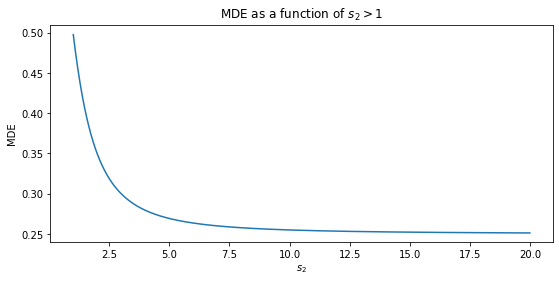

In [3]:
s = np.arange(1+0.01,20,0.01)
MDE = 0.25+0.5/(1+s**2)
plt.figure(figsize=(9, 4))
plt.plot(s,MDE)
plt.ylim([0.24,0.51])
plt.xlabel('$s_2$')
plt.ylabel('MDE')
plt.title('MDE as a function of $s_2>1$')
plt.show()

__(c) Plot the two MDE bounds from the lecture as a function of $s_2 > 1$.__

$
\begin{align*}
&I_{JS} (s_1,s_2) =\frac{1}{2} D_{KL} [\,p(r|s_1)\parallel p(r)] + \frac{1}{2} D_{KL} [\,p(r|s_2)\parallel p(r)]\\
&s_1=1, s_2>1, \Delta s = s_2-s_1
\end{align*}
$

$
\begin{align*}
&\text{On lecture 5 slides 10, it was shown that:}\\
&\varepsilon(\Delta s) \leqslant \frac{1}{2} - \frac{1}{2}\mathcal{I}_{JS}(\Delta s)
\quad (\text{Upper bound})\\
\end{align*}
$

$
\begin{align*}
&\text{Use Fano's inequality:}\\
&H[\varepsilon] \geqslant 1-\mathcal{I}_{JS}(\Delta s) = 1-\frac{(\Delta s)^2}{8}\\
&\text{The entropy of Bernoulli variable is: }\\
&H[p] = -p\log p -(1-p)\log(1-p)\\
&\therefore \varepsilon(\Delta s) \geqslant H_B^{-1}(1-\mathcal{I}_{JS}(\Delta s))
\quad (\text{Lower bound})
\end{align*}
$

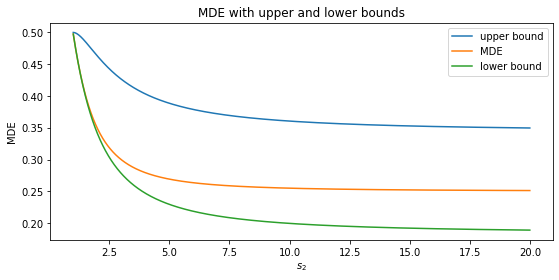

In [4]:
prob_r_given_s = lambda r,s: s**(2-2*r)/(1+s**2)
prob_r = lambda r,s2: 0.5*prob_r_given_s(r,1)+0.5*prob_r_given_s(r,s2)  #s1=1
def D_KL(s,s2):
    s1 = 1
    r=[0,1]
    SUM = 0
    for i in range(len(r)):
        SUM += prob_r_given_s(r[i],s)*np.log2(prob_r(r[i],s2)/prob_r_given_s(r[i],s))
    result = -SUM
    return result
I_JS = lambda s2: 0.5*D_KL(1,s2)+0.5*D_KL(s2,s2)
upper_bound = lambda s2: 0.5-0.5*I_JS(s2)

def H_half(p):
# use the left half of the entropy function for finding inverse later
    result = 0
    if (p>0) and (p<.5):  
        result = -p*np.log2(p)-(1-p)*np.log2(1-p)
    return result

def lower_bound(s2):
    result = []
    for i in range(len(s2)):
        func = lambda p: H_half(p)-(1-I_JS(s2[i]))
        root = broyden1(func, xin=0.25)
        result.append(root)
    return result

s2 = np.arange(1+0.01,20,0.01)
MDE = 0.25+0.5/(1+s2**2)

plt.figure(figsize=(9, 4))
plt.plot(s2,upper_bound(s2),label='upper bound')
plt.plot(s2,MDE,label='MDE')
plt.plot(s2,lower_bound(s2),label='lower bound')
plt.legend()
plt.xlabel('$s_2$')
plt.ylabel('MDE')
plt.title('MDE with upper and lower bounds')
plt.show()

__3. Let the stimulus have one of two values s1 and s2 with equal probabilities. Show that the Jensen-Shannon-Divergence:<br>
$I_{JS} (s_1,s_2) =\frac{1}{2} D_{KL} [\,p(r|s_1)\parallel p(r)] + \frac{1}{2} D_{KL} [\,p(r|s_2)\parallel p(r)]$<br>
Is equal to the mutual information between the response and the class of stimulus I ∈{1,2} (p(I = 1) = 0.5)<br>
$MI(r,I) =\sum_{i=1}^{2} \int_{-\infty}^{\infty} p(r,i)\log \frac{p(r,i)}{p(r)p(i)} \mathrm{d}r$__


$
\begin{align*}
I_{JS} (s_1,s_2) &=\frac{1}{2} D_{KL} [\,p(r|s_1)\parallel p(r)] + \frac{1}{2} D_{KL} [\,p(r|s_2)\parallel p(r)]\\
&= \frac{1}{2} \int_{-\infty}^{\infty} \! p(r|s_1) \log \frac{p(r|s_1)}{p(r)} \, \mathrm{d}r
+ \frac{1}{2} \int_{-\infty}^{\infty} \! p(r|s_2) \log \frac{p(r|s_2)}{p(r)} \, \mathrm{d}r
\end{align*}
$

$
\begin{align*}
MI(r,I) &=\sum_{i=1}^{2} \int_{-\infty}^{\infty} \! p(r,i)\log \frac{p(r,i)}{p(r)p(i)} \, \mathrm{d}r\\
&= \int_{-\infty}^{\infty} \! p(r|I=1)p(I=1)\log \frac{p(r|I=1)p(I=1)}{p(r)p(I=1)} \, \mathrm{d}r
+ \int_{-\infty}^{\infty} \! p(r|I=2)p(I=2)\log \frac{p(r|I=2)p(I=2)}{p(r)p(I=2)} \, \mathrm{d}r
\end{align*}
$
<br><br>
$
\begin{align*}
&\because p(I=1) = p(I=2) = 0.5\\
&\therefore MI(r,I) = \frac{1}{2}\int_{-\infty}^{\infty} \! p(r|I=1)\log \frac{p(r|I=1)}{p(r)} \, \mathrm{d}r
+ \frac{1}{2}\int_{-\infty}^{\infty} \! p(r|I=2)\log \frac{p(r|I=2)}{p(r)} \, \mathrm{d}r
\end{align*}
$

$
\begin{align*}
\text{Let } &I=1 \Rightarrow s_1\\
&I=2 \Rightarrow s_2
\end{align*}
$

$
\begin{align*}
\therefore MI(r,I) = I_{JS} (s_1,s_2)
\end{align*}
$

__4.∗ In this task we will try to understand why $d' = \sqrt{\Delta \mu^T \Sigma^{−1} \Delta \mu}$ measures the minimal linear discrimination error via<br>
$LDE = 1−\Psi(d'/2)$,<br>
with $\Psi$ a CDF of normal distribution $\Delta \mu = f(s)−f(s+\Delta s)$ for any Gaussian population model with $r \sim \mathcal{N}(f(s),\Sigma)$.<br><br>
(a) Write down the optimal linear classiﬁer for two normal distributions with arbitrary means $\mu_1, \mu_2$ covariance matrices $\Sigma_1, \Sigma_2$ and equal class probabilities.__

$
\begin{align*}
\text{We want to maximize J:}\\
\end{align*}
$

$
\begin{align*}
J &= \frac{\parallel \omega^T \mu_1 - \omega^T\mu_2 \parallel_2^2}{\omega^T \Sigma_1 \omega + \omega^T \Sigma_2 \omega}\\
&= \frac{\omega^T (\mu_1-\mu_2)(\mu_1-\mu_2)^T \omega}{\omega^T (\Sigma_1+\Sigma_2) \omega}
\quad ,\text{where }\omega \text{ is the direction of projection}
\end{align*}
$

$
\begin{align*}
&\text{Define the within-class scatter matrix: }\\
& S_w = \Sigma_1+\Sigma_2\\
&\text{And the between-class scatter matrix:}\\
& S_b = (\mu_1-\mu_2)(\mu_1-\mu_2)^T
\end{align*}
$

$
\begin{align*}
&\text{The generalized Rayleigh quotient is:}
& J = \frac{\omega^T S_b \omega}{\omega^T S_w \omega}
\end{align*}
$

$
\begin{align*}
&\omega\text{ is a second order term on both numerator and denominator, so the length of } \omega 
\text{has no effect on J.}\\
&\text{ so we can set } \omega^T S_w \omega = 1 \text{ without loss of generalization.}\\
&\text{Then, maximize J is equal to :}\\
& max \quad \omega^T S_b \omega\\
& s.t. \quad \omega^T S_w \omega = 1 
\end{align*}
$

$
\begin{align*}
\text{Use Lagrange multipliers: } &L = \omega^T S_b \omega - \lambda (\omega^T S_w \omega - 1)
\quad \quad ,\text{using } \frac{\partial x^T B x}{\partial x} = (B + B^T) x\\
&\frac{\partial L}{\partial \omega} = 2 S_b \omega - 2 \lambda S_w \omega = 0 
\quad \Rightarrow \, S_b\omega = \lambda S_w \omega,\\
\end{align*}
$

$
\begin{align*}
&\text{We noticed that } S_b\omega = (\mu_1-\mu_2)(\mu_1-\mu_2)^T \omega, 
\text{where }(\mu_1-\mu_2)^T \omega \text{ is a scalar.}\\
&\text{So, } S_w \omega = \lambda_1 \,  (\mu_1-\mu_2)\\
&\therefore \omega = S_w^{-1}(\mu_1-\mu_2) = (\Sigma_1+\Sigma_2)^{-1}(\mu_1-\mu_2)\\
&\therefore Y = \omega^T X \text{ is the projection that best separate these two classes.}
\end{align*}
$

__(b) Show that d' measures the minimal linear discrimination error.__

Inspirations from http://users.stat.umn.edu/~helwig/notes/discla-Notes.pdf slides 33~38, I completedsome missing steps on the slides.

![title](Q4b_1.jpg)

$
\begin{align*}
&\text{In this question, We consider two Gaussians with same convariance and different means.}\\
&\text{Therefore, }\omega = S_w^{-1}(\mu_1-\mu_2) = (\Sigma_1+\Sigma_2)^{-1}(\mu_1-\mu_2) 
= \frac{1}{2} \Sigma^{-1} (\mu_1-\mu_2)\\
&\text{Again, the length of $\omega$ doesn't matter, so we can rewrite it into: }
\omega = \Sigma^{-1} (\mu_1-\mu_2)
\end{align*}
$

$
\begin{align*}
\text{Let } &f_1(x) \sim \mathcal{N}(\mu_1,\Sigma) \text{ denote the pdf for population } \pi_1\\
&f_2(x) \sim \mathcal{N}(\mu_2,\Sigma) \text{ denote the pdf for population } \pi_2\\
\end{align*}
$

$
\begin{align*}
&\text{The projection process is:}\\
&\quad Y = \omega^T X = (\mu_1 - \mu_2)^T \Sigma^{-1} X, \quad \text{where } X \text{ is the data matrix}\\
\end{align*}
$

$
\begin{align*}
\therefore \, \, &\mu_{Y_1} = \omega^T \mu_1 = (\mu_1-\mu_2)^T\Sigma^{-1}\mu_1\\
&\mu_{Y_2} = \omega^T \mu_2 = (\mu_1-\mu_2)^T\Sigma^{-1}\mu_2\\
&\sigma_Y^2 = \omega^T \Sigma \omega = (\mu_1-\mu_2)^T\Sigma^{-1} \Sigma \, \, \Sigma^{-1} (\mu_1-\mu_2)
= (\mu_1-\mu_2)^T\Sigma^{-1} (\mu_1-\mu_2) = (d')^2\\
& \text{And the class separation is at: } m = \frac{1}{2}(\mu_{Y_1}+\mu_{Y_2}) = \frac{1}{2} (\mu_1-\mu_2)^T\Sigma^{-1}(\mu_1+\mu_2)\\
&(\text{Assuming equal class probabilities and equal misclassification cost})\\
\end{align*}
$

$
\begin{align*}
\text{After projection, data from population } \pi_1 \text{ falls into } Y_1 \sim \mathcal{N}(\mu_{Y_1}, (d')^2),\\
\text{data from population } \pi_2 \text{ falls into } Y_2 \sim \mathcal{N}(\mu_{Y_2}, (d')^2).
\end{align*}
$

$
\begin{align*}
P(\text{misclassify $\pi_1$ as $\pi_2$}) &= P(Y_1 < m) \\
&= P \big(z = \frac{Y_1-\mu_{Y_1}}{\sigma_Y} < \frac{m-\mu_{Y_1}}{\sigma_Y} \big)\\
&= P \big(z<\frac{\frac{1}{2}(\mu_{Y_1}+\mu_{Y_2})-\mu_{Y_1}}{\sigma_Y} = \frac{\frac{1}{2}(\mu_{Y_2}-\mu_{Y_1})}{\sigma_Y}\big)\\
&= P(z < \frac{-\frac{1}{2}(d')^2}{d'}) = \Psi(-\frac{d'}{2})
\end{align*}
$
 
$
\begin{align*}
\Psi(\cdot) \text{ denotes the CDF of the standard normal distribution, so } \Psi(-\frac{d'}{2}) = 1-\Psi(\frac{d'}{2})
\end{align*}
$

$
\begin{align*}
&P(\text{misclassify $\pi_2$ as $\pi_1$}) = P(\text{misclassify $\pi_1$ as $\pi_2$}), 
\text{because $Y_1$ and $Y_2$ have same variance }\\ 
\\
&\text{Assume they have equal class probabilities, }p_1 = p_2 = 0.5,\\
&\text{then } LDE = p_1 \cdot P(\text{misclassify $\pi_1$ as $\pi_2$}) 
+ p_2 \cdot P(\text{misclassify $\pi_2$ as $\pi_1$}) = 1-\Psi(\frac{d'}{2})
\end{align*}
$

$
\begin{align*}
\therefore d' = \sqrt{\Delta \mu^T \Sigma^{−1} \Delta \mu} \,\, 
\text{ measures the minimal linear discrimination error via } \,
LDE = 1−\Psi(d'/2)
\end{align*}
$
